## <center> LGMVIP_DS_ September_23_Task_Number_1-3 <center>
## <center> Music Recommendation <center>
## <center> By K. Pavan Kumar <center>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from collections import Counter
from sklearn.model_selection import train_test_split
import lightgbm as lgbm

## Loading Data

In [4]:
data=pd.read_csv('/kaggle/input/song-recommendation/song_merge.csv')

In [5]:
data.head()

,Unnamed: 0,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,song_id,name,...,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,1207,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,wVyFY6tmkyscQuCGAKKm3nmw8VkP6mgoV0EgFS4AHWE=,我回來了 (Wo Hui Lai Liao),...,search,Search,song,0,199645,458,蔡旻佑 (Evan Yo),Evan Yo,Evan Yo,3.0
1,1208,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,手心的薔薇 (Beautiful) feat. G.E.M.鄧紫棋,...,search,Search,song,0,280084,465,林俊傑 (JJ Lin),林俊傑,林怡鳳,3.0
2,1210,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,gG3/58uZyyOwaPT+eGWL81mwCzcDPW2EmwYcjWmvJSs=,私奔到月球,...,search,Online playlist more,online-playlist,0,226742,465,五月天 (Mayday),阿信,阿信,3.0
3,1211,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,sP8VRNknfFD+OJaywVekjHW3XY35fgcUfVey6TzwkTo=,單行的軌道 (One Way Road),...,discover,Online playlist more,song-based-playlist,0,248790,465,G.E.M.鄧紫棋,G.E.M. 鄧紫棋,G.E.M. 鄧紫棋,3.0
4,1212,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,YYCF0CSZJnL+0jfC2/hu7ECGvSJxoM0p8GcZMoeqjHE=,出賣,...,search,Search,song,0,232872,458,周傳雄 (Steve Chou),周傳雄,林夕,3.0


In [6]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [7]:
data.reset_index(inplace=True)

In [8]:
data.head()

,index,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,song_id,name,...,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,0,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,wVyFY6tmkyscQuCGAKKm3nmw8VkP6mgoV0EgFS4AHWE=,我回來了 (Wo Hui Lai Liao),...,search,Search,song,0,199645,458,蔡旻佑 (Evan Yo),Evan Yo,Evan Yo,3.0
1,1,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,手心的薔薇 (Beautiful) feat. G.E.M.鄧紫棋,...,search,Search,song,0,280084,465,林俊傑 (JJ Lin),林俊傑,林怡鳳,3.0
2,2,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,gG3/58uZyyOwaPT+eGWL81mwCzcDPW2EmwYcjWmvJSs=,私奔到月球,...,search,Online playlist more,online-playlist,0,226742,465,五月天 (Mayday),阿信,阿信,3.0
3,3,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,sP8VRNknfFD+OJaywVekjHW3XY35fgcUfVey6TzwkTo=,單行的軌道 (One Way Road),...,discover,Online playlist more,song-based-playlist,0,248790,465,G.E.M.鄧紫棋,G.E.M. 鄧紫棋,G.E.M. 鄧紫棋,3.0
4,4,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,20060531,20170816,YYCF0CSZJnL+0jfC2/hu7ECGvSJxoM0p8GcZMoeqjHE=,出賣,...,search,Search,song,0,232872,458,周傳雄 (Steve Chou),周傳雄,林夕,3.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199242 entries, 0 to 2199241
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   index                   int64  
 1   msno                    object 
 2   city                    int64  
 3   bd                      int64  
 4   gender                  object 
 5   registered_via          int64  
 6   registration_init_time  int64  
 7   expiration_date         int64  
 8   song_id                 object 
 9   name                    object 
 10  isrc                    object 
 11  source_system_tab       object 
 12  source_screen_name      object 
 13  source_type             object 
 14  target                  int64  
 15  song_length             int64  
 16  genre_ids               object 
 17  artist_name             object 
 18  composer                object 
 19  lyricist                object 
 20  language                float64
dtypes: float64(1), int64(8), object

In [10]:
data.describe()

,index,city,bd,registered_via,registration_init_time,expiration_date,target,song_length,language
count,2.199242e+06,2.199242e+06,2.199242e+06,2.199242e+06,2.199242e+06,2.199242e+06,2.199242e+06,2.199242e+06,2.199242e+06
mean,1.099620e+06,1.087023e+01,2.793586e+01,6.914930e+00,2.011855e+07,2.017207e+07,5.406590e-01,2.498336e+05,1.074747e+01
std,6.348666e+05,5.862506e+00,2.281878e+01,2.592579e+00,3.215168e+04,4.155703e+03,4.983442e-01,4.362279e+04,1.609233e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,2.004033e+07,2.004102e+07,0.000000e+00,4.109000e+03,-1.000000e+00
25%,5.498102e+05,5.000000e+00,2.200000e+01,4.000000e+00,2.010093e+07,2.017091e+07,0.000000e+00,2.221010e+05,3.000000e+00
50%,1.099620e+06,1.300000e+01,2.600000e+01,9.000000e+00,2.012102e+07,2.017093e+07,1.000000e+00,2.486590e+05,3.000000e+00
75%,1.649431e+06,1.400000e+01,3.200000e+01,9.000000e+00,2.014120e+07,2.017102e+07,1.000000e+00,2.752260e+05,3.000000e+00
max,2.199241e+06,2.200000e+01,1.030000e+03,1.300000e+01,2.017013e+07,2.020102e+07,1.000000e+00,4.793341e+06,5.900000e+01


In [11]:
data.isnull().sum()

index                     0
msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
song_id                   0
name                      0
isrc                      0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
dtype: int64

In [12]:
non_object_col=data.select_dtypes(exclude='object').columns

## Exploratory Data Analysis

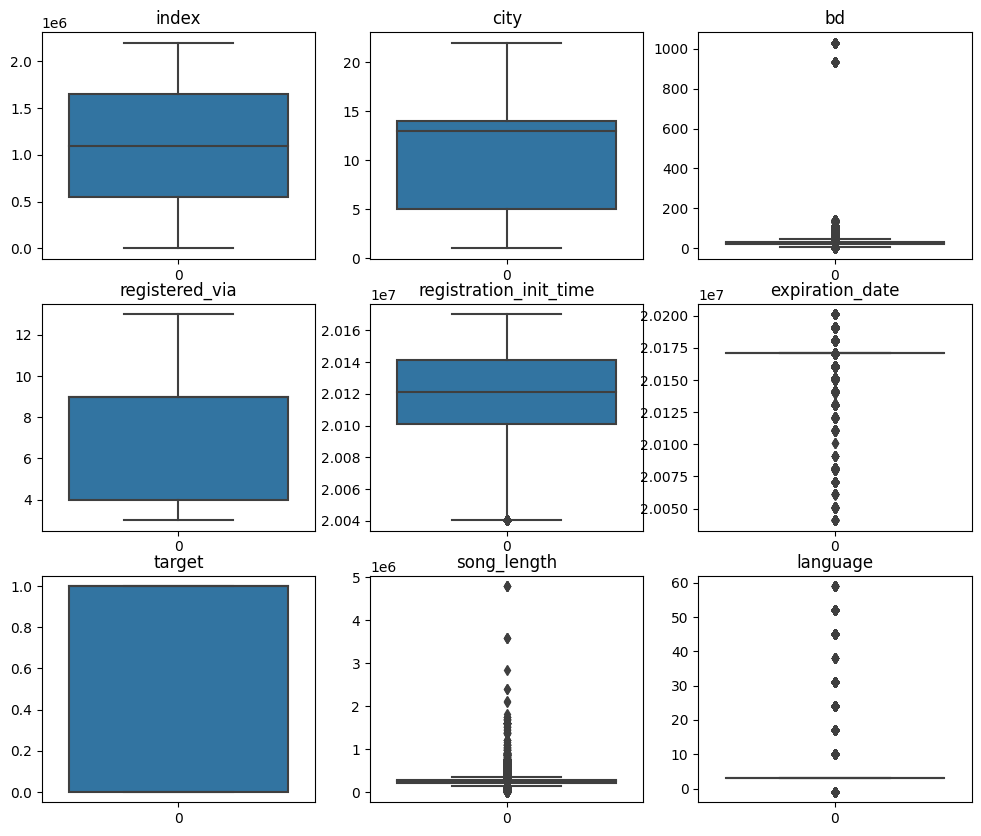

In [13]:
plt.figure(figsize=(12,10))
for i in range(len(non_object_col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[non_object_col[i]])
    plt.title(non_object_col[i])

From above boxplots, we can see for 'bd' (age) column there are outliers.
So we'll cap age >0 and age<=100

In [14]:
data=data[(data.bd>0)&(data.bd<=100)]

Text(0.5, 1.0, 'No. of Users in Each Age')

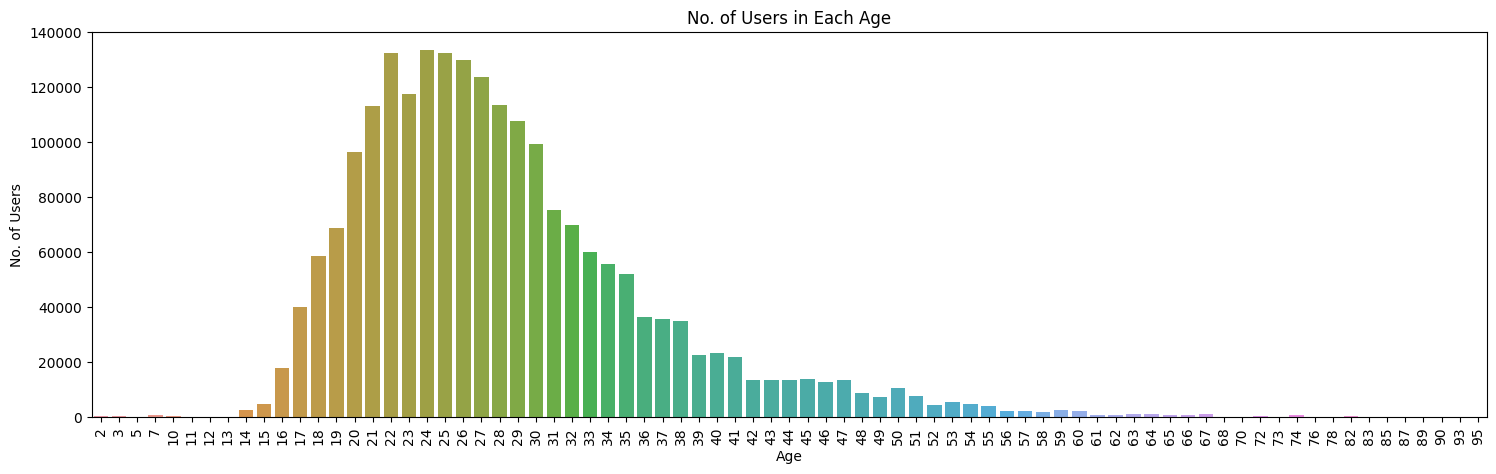

In [15]:
plt.figure(figsize=(18,5))
sns.countplot(data=data,x='bd')
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('No. of Users')
plt.title('No. of Users in Each Age')

In [16]:
print('The 50th percentile of Age is: ',np.percentile(data.bd,50))

The 50th percentile of Age is:  27.0


In [17]:
print("67% of Users fall in the Age Group:",
      (np.round(np.mean(data.bd)-np.std(data.bd)),np.round(np.mean(data.bd)+np.std(data.bd))))
print("67% of Male Users fall in the Age Group:",
      (np.round(np.mean(data.bd[data.gender=='male'])-np.std(data.bd[data.gender=='male'])),
       np.round(np.mean(data.bd[data.gender=='male'])+np.std(data.bd[data.gender=='male']))))
print("67% of Female Users fall in the Age Group:",
      (np.round(np.mean(data.bd[data.gender=='female'])-np.std(data.bd[data.gender=='female'])),
       np.round(np.mean(data.bd[data.gender=='female'])+np.std(data.bd[data.gender=='female']))))

67% of Users fall in the Age Group: (20.0, 36.0)
67% of Male Users fall in the Age Group: (20.0, 36.0)
67% of Female Users fall in the Age Group: (20.0, 37.0)


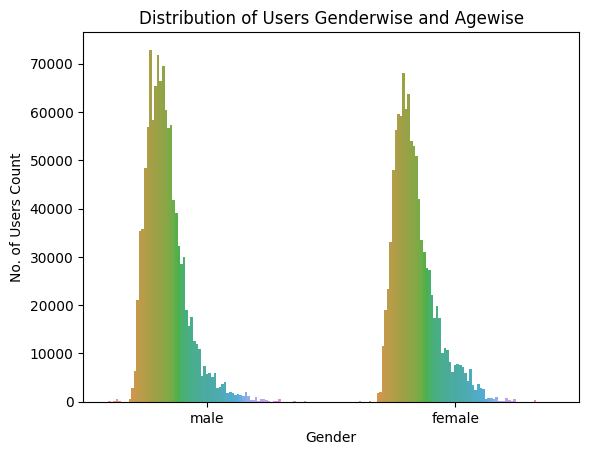

In [18]:
ax=sns.countplot(data=data,x='gender',hue='bd')
plt.xlabel('Gender')
plt.ylabel('No. of Users Count')
plt.title('Distribution of Users Genderwise and Agewise')
ax.get_legend().set_visible(False)

Text(0.5, 1.0, 'No. of Users in Each City')

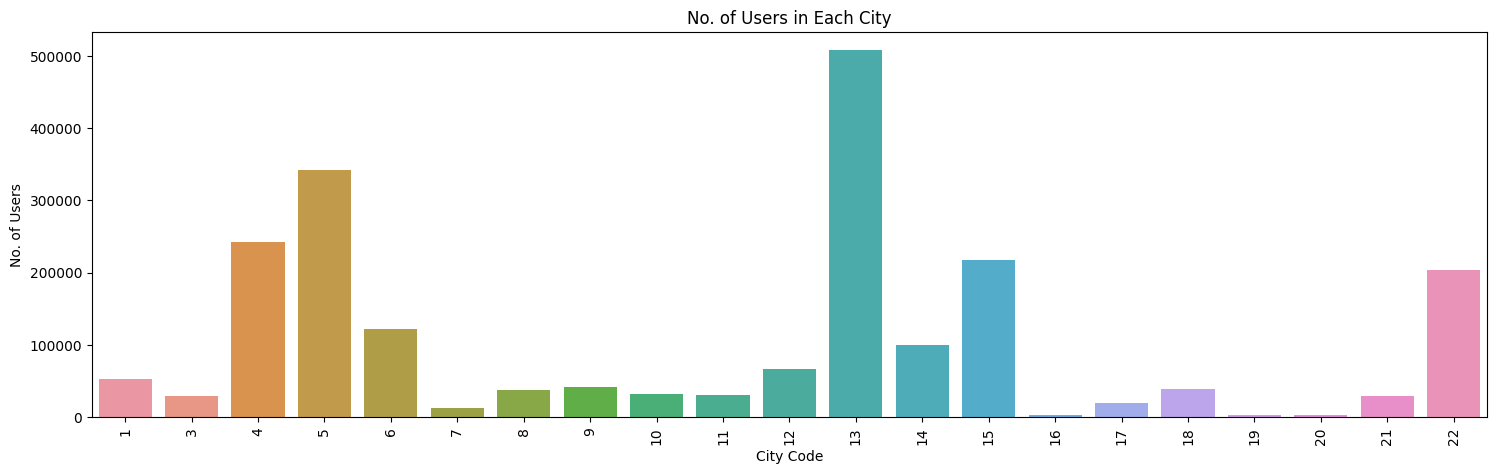

In [19]:
plt.figure(figsize=(18,5))
sns.countplot(data=data,x='city')
plt.xticks(rotation=90)
plt.xlabel('City Code')
plt.ylabel('No. of Users')
plt.title('No. of Users in Each City')

* City Code 13 is on top spot with most number of users.
* Next to that is City Code 5

In [20]:
data1=data.copy()

In [21]:
data.genre_ids

0                458
1                465
2                465
3                465
4                458
             ...    
2199237          465
2199238          465
2199239    1616|1609
2199240    1609|2107
2199241    1616|1609
Name: genre_ids, Length: 2132753, dtype: object

In [22]:
data1['genres']=data1.genre_ids.apply(lambda x:re.findall(r'\d+| ',x))

In [23]:
data1.reset_index(inplace=True)

In [24]:
genre=[]
for i in range(len(data1)):
    genre.extend(data1.genres[i])

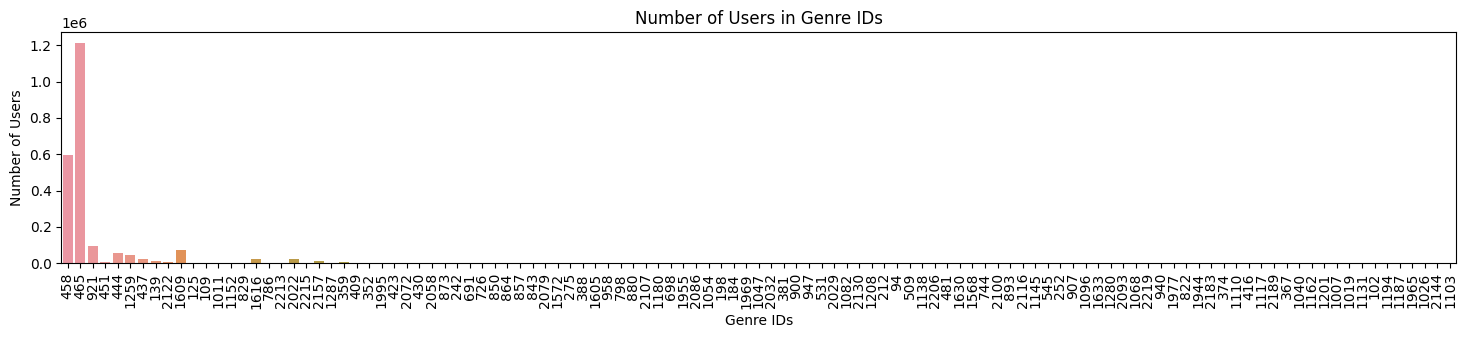

In [25]:
plt.figure(figsize=(18,3))
sns.countplot(x=genre)
plt.xticks(rotation=90)
plt.xlabel('Genre IDs')
plt.ylabel('Number of Users')
plt.title('Number of Users in Genre IDs')
plt.show()

* 465 is the top genre_id users most listened to.
* 458 is the next top genre_id

In [26]:
data1.drop(['level_0','index'],axis=1,inplace=True)

In [27]:
data1.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_id', 'name', 'isrc',
       'source_system_tab', 'source_screen_name', 'source_type', 'target',
       'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist',
       'language', 'genres'],
      dtype='object')

Text(0.5, 1.0, 'Entry Point')

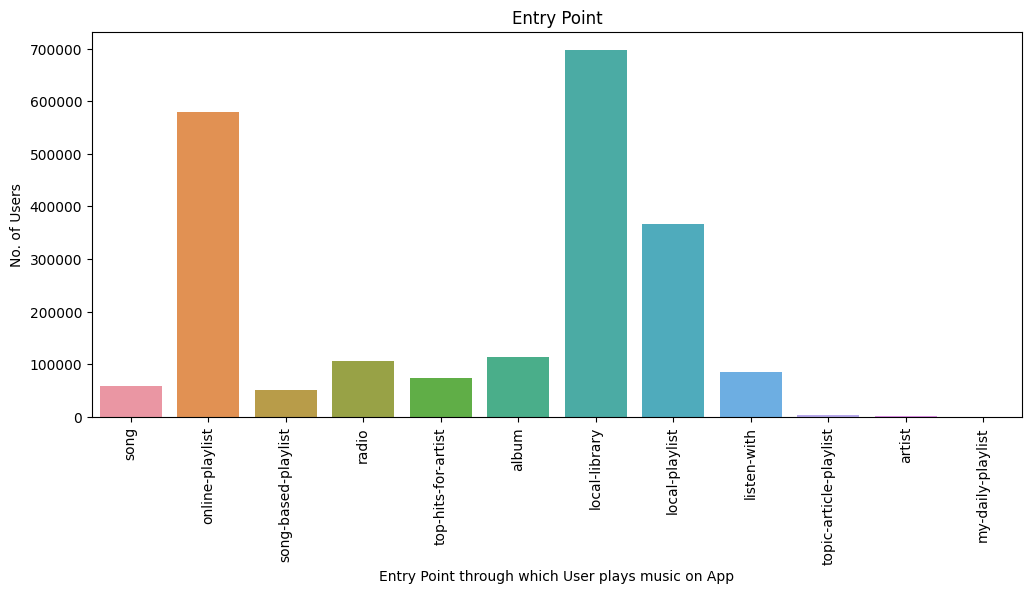

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='source_type')
plt.xticks(rotation=90)
plt.xlabel('Entry Point through which User plays music on App')
plt.ylabel('No. of Users')
plt.title('Entry Point')

* 'local-library' is the top entry point for users through which they play music on app.
* 'online-playlist' is the next top entry opint for users.

Text(0.5, 1.0, 'Modes of Event Triggering')

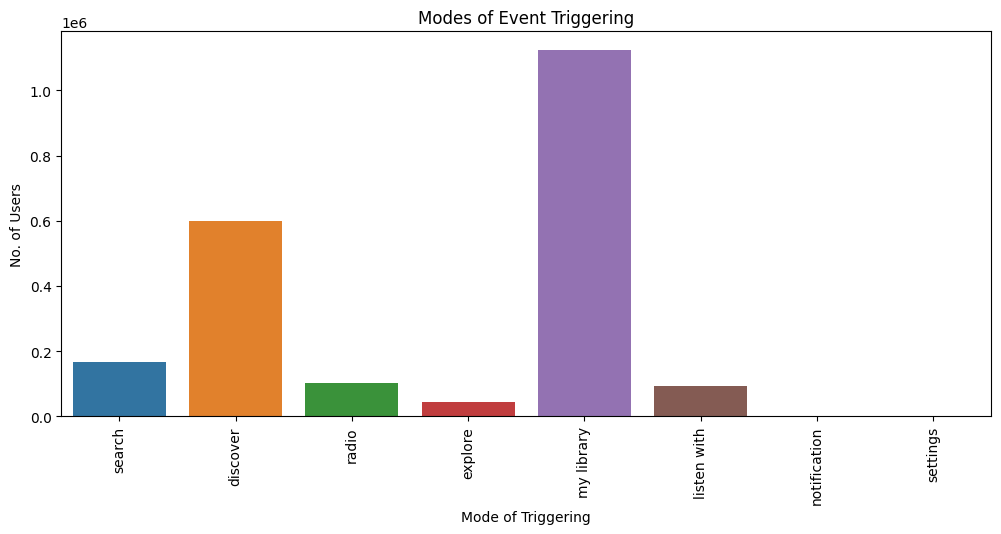

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(data=data,x='source_system_tab')
plt.xticks(rotation=90)
plt.xlabel('Mode of Triggering')
plt.ylabel('No. of Users')
plt.title('Modes of Event Triggering')

* 'my library' is the top mode for event triggering.
* 'discover' is the next top mode.

In [30]:
top15composers=data1.composer.value_counts()[:16]

In [31]:
top15composers

composer
周杰倫           113656
阿信             50691
林俊傑            43163
JJ Lin         25978
張簡君偉           23361
Eric Chou      22768
韋禮安            20568
陳皓宇            17547
R-chord        17263
怪獸             17202
吳青峰            16834
G.E.M. 鄧紫棋     15750
周湯豪            15487
陳小霞            14865
吳克群            13990
八三夭 阿璞         13794
Name: count, dtype: int64

In [32]:
top15artists=data1.artist_name.value_counts()[:15]

In [33]:
top15artists

artist_name
周杰倫 (Jay Chou)      104992
五月天 (Mayday)         89941
林俊傑 (JJ Lin)         61328
Various Artists      57185
田馥甄 (Hebe)           56888
謝和弦 (R-chord)        31784
aMEI (張惠妹)           30870
A-Lin                27250
G.E.M.鄧紫棋            26792
Eric 周興哲             26093
丁噹 (Della)           25979
BIGBANG              23358
林宥嘉 (Yoga Lin)       23076
The Chainsmokers     22065
玖壹壹                  21915
Name: count, dtype: int64

Text(0.5, 1.0, 'Varition in Number of users by Language')

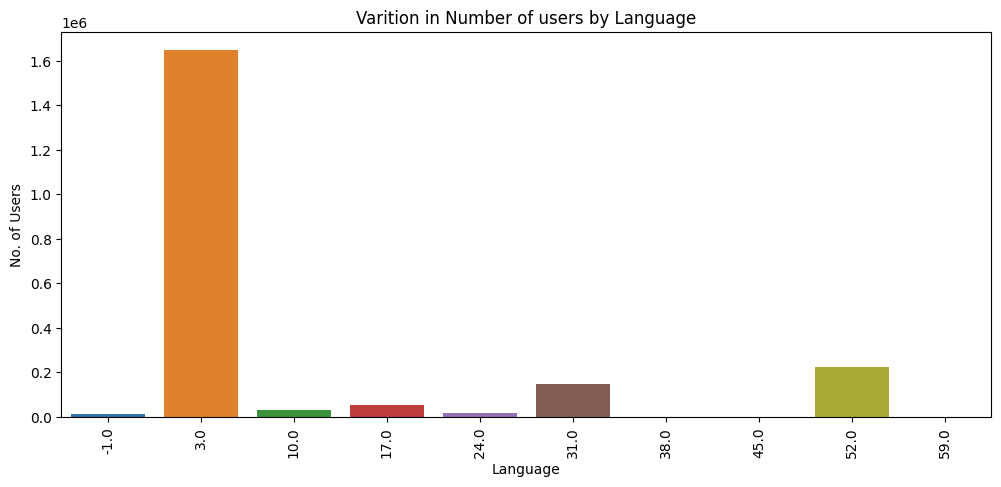

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(data=data1,x='language')
plt.xticks(rotation=90)
plt.xlabel('Language')
plt.ylabel('No. of Users')
plt.title('Varition in Number of users by Language')

* '3' is the popular Language code to which most users listen to.

In [35]:
data1.registration_init_time

0          20060531
1          20060531
2          20060531
3          20060531
4          20060531
             ...   
2132748    20141024
2132749    20141024
2132750    20141024
2132751    20141024
2132752    20141024
Name: registration_init_time, Length: 2132753, dtype: int64

In [36]:
data1['registration_init_time']=pd.to_datetime(data1['registration_init_time'],format='%Y%m%d')

In [37]:
data1['expiration_date']=pd.to_datetime(data1['expiration_date'],format='%Y%m%d')

In [38]:
users_registered_init=data1['registration_init_time'].value_counts()

In [39]:
users_registered_init=pd.DataFrame(users_registered_init)

In [40]:
users_registered_init

,count
registration_init_time,
2012-10-27,5036
2011-06-11,3958
2011-12-28,3524
2016-03-06,3234
2011-12-30,3051
...,...
2015-06-23,1
2005-06-21,1
2004-10-22,1


Text(0.5, 1.0, 'Variation of Regsiterd Users over time')

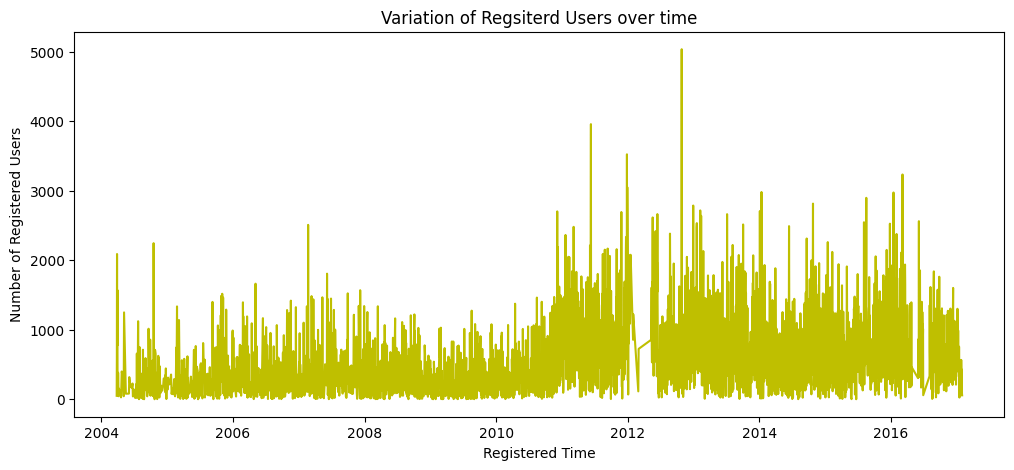

In [41]:
plt.figure(figsize=(12,5))
sns.lineplot(data=users_registered_init,x=users_registered_init.index,y='count',color='y')
plt.xlabel('Registered Time')
plt.ylabel('Number of Registered Users')
plt.title('Variation of Regsiterd Users over time')

In [42]:
users_expiration_date=data1.expiration_date.value_counts()

In [43]:
users_expiration_date=pd.DataFrame(users_expiration_date)
users_expiration_date

,count
expiration_date,
2017-09-30,204496
2017-10-04,51576
2017-10-06,46006
2017-10-05,45351
2017-10-02,43946
...,...
2007-10-06,1
2016-01-14,1
2016-06-01,1


Text(0.5, 1.0, 'Variation of Expired Users over time')

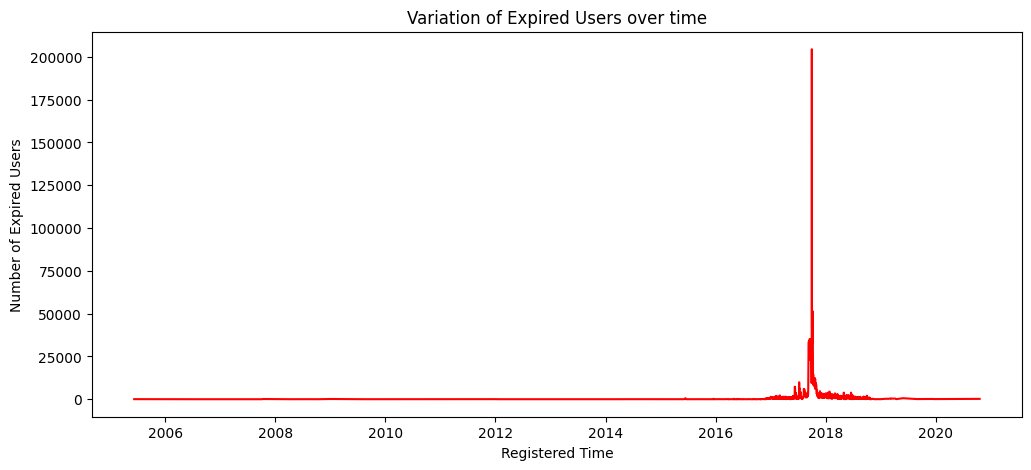

In [44]:
plt.figure(figsize=(12,5))
sns.lineplot(data=users_expiration_date,x=users_expiration_date.index,y='count',color='r')
plt.xlabel('Registered Time')
plt.ylabel('Number of Expired Users')
plt.title('Variation of Expired Users over time')

- The number of Expired users suddenly spiked during the end of year 2017

In [45]:
expiration_time=(data1['expiration_date']-data1['registration_init_time'])
expiration_time=pd.DataFrame(expiration_time)
expiration_time.columns=['days']
expiration_time

,days
0,4095 days
1,4095 days
2,4095 days
3,4095 days
4,4095 days
...,...
2132748,937 days
2132749,937 days
2132750,937 days
2132751,937 days


Text(0.5, 1.0, 'Distribution Plot of difference between Registration Date and Expiration Date')

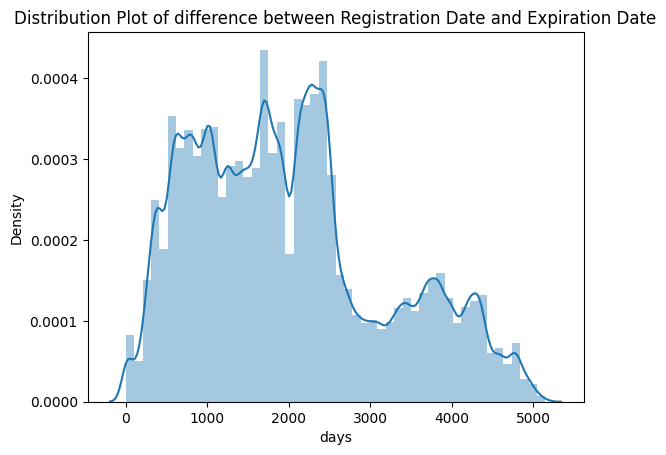

In [46]:
sns.distplot(expiration_time['days'].dt.days)
plt.title('Distribution Plot of difference between Registration Date and Expiration Date')

In [47]:
data1.target.value_counts()/len(data1)*100

target
1    54.037856
0    45.962144
Name: count, dtype: float64

Text(0.5, 1.0, 'Name of Layout and the Number of Users using it')

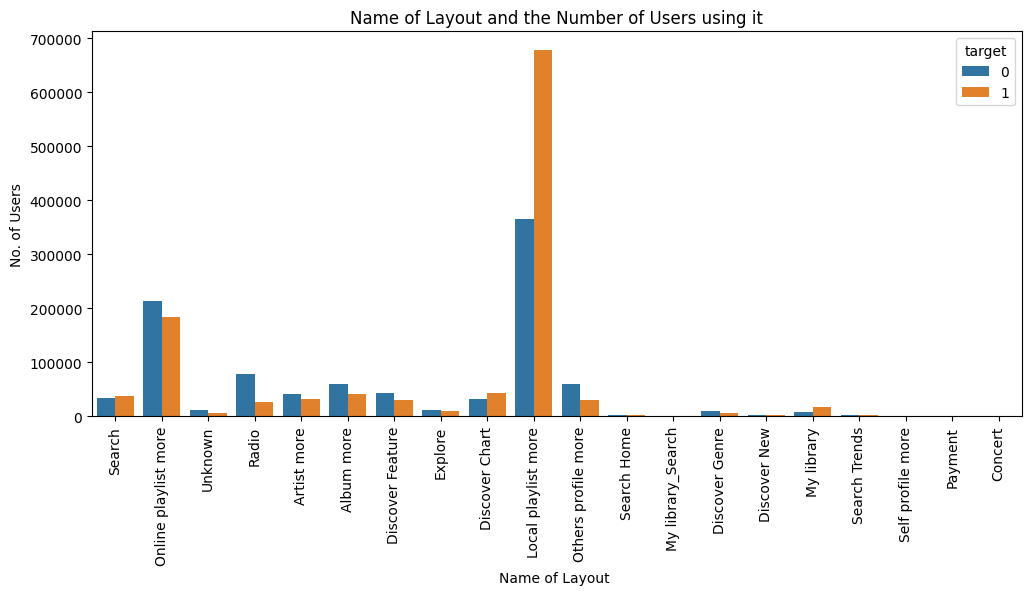

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(data=data1,x='source_screen_name',hue='target')
plt.xticks(rotation=90)
plt.xlabel('Name of Layout ')
plt.ylabel('No. of Users')
plt.title('Name of Layout and the Number of Users using it')

* 'Local Playlist More' and 'Online Playlist More' are the top two layouts preferred by Users

In [49]:
data1.select_dtypes(include='object').columns

Index(['msno', 'gender', 'song_id', 'name', 'isrc', 'source_system_tab',
       'source_screen_name', 'source_type', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'genres'],
      dtype='object')

In [50]:
obj_col=data.select_dtypes(include='object').columns

In [127]:
obj_col

Index(['msno', 'gender', 'song_id', 'name', 'isrc', 'source_system_tab',
       'source_screen_name', 'source_type', 'genre_ids', 'artist_name',
       'composer', 'lyricist'],
      dtype='object')

## Train Test Splitting

In [118]:
data2=data.copy()
data2['days']=(pd.to_datetime(data['expiration_date'],format='%Y%m%d')-pd.to_datetime(data['registration_init_time'],format='%Y%m%d')).dt.days

In [119]:
# Converting 'object' data type columns to 'category' data type
for i in obj_col:
    data[i]=data[i].astype('category')

In [120]:
data2.drop(['index','expiration_date','registration_init_time'],axis=1,inplace=True)

In [121]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2132753 entries, 0 to 2199241
Data columns (total 19 columns):
 #   Column              Dtype   
---  ------              -----   
 0   msno                category
 1   city                int64   
 2   bd                  int64   
 3   gender              category
 4   registered_via      int64   
 5   song_id             category
 6   name                category
 7   isrc                category
 8   source_system_tab   category
 9   source_screen_name  category
 10  source_type         category
 11  target              int64   
 12  song_length         int64   
 13  genre_ids           category
 14  artist_name         category
 15  composer            category
 16  lyricist            category
 17  language            float64 
 18  days                int64   
dtypes: category(12), float64(1), int64(6)
memory usage: 191.6 MB


In [122]:
y=data2.pop('target')
X=data2

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## LGBM Model

In [136]:
lgb_model=lgbm.sklearn.LGBMClassifier(objective='binary',
                                     eval_metric='binary_logloss',
                                     boosting='gbdt',
                                     learning_rate=0.3,
                                     verbose=0,
                                     num_leaves=600,
                                     bagging_freq=1,
                                     feature_fraction=0.9,
                                     max_bin=256,
                                     max_depth=200,
                                     num_rounds=200)

In [137]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=200, num_rounds=200 will be ignored. Current value: num_iterations=200
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.256542 seco

LGBMClassifier(bagging_freq=1, boosting='gbdt', eval_metric='binary_logloss',
               feature_fraction=0.9, learning_rate=0.3, max_bin=256,
               max_depth=200, num_leaves=600, num_rounds=200,
               objective='binary', verbose=0)

In [141]:
y_pred=lgb_model.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [150]:
print('The Accuracy of LGBM Model on Test Dataset is: ',accuracy_score(y_test,y_pred))
print('The Precision of LGBM Model on Test Dataset is: ',precision_score(y_test,y_pred))
print('The Recall of LGBM Model on Test Dataset is: ',recall_score(y_test,y_pred))

The Accuracy of LGBM Model on Test Dataset is:  0.7358744909752878
The Precision of LGBM Model on Test Dataset is:  0.7510849401793768
The Recall of LGBM Model on Test Dataset is:  0.7652314134491592


In [152]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[137356,  58504],
       [ 54159, 176532]])

Text(0.5, 1.0, 'Confusion Matrix on Test Dataset')

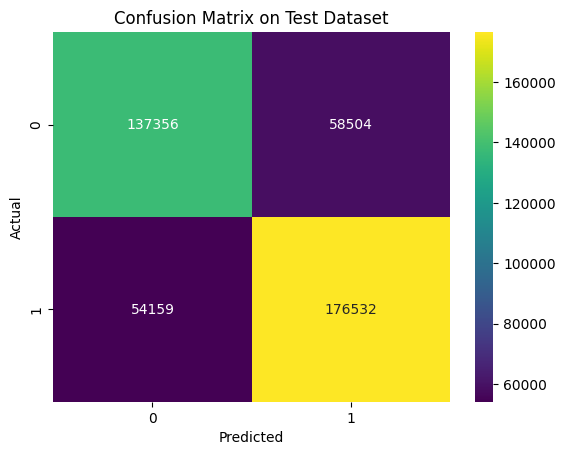

In [159]:
sns.heatmap(cf,fmt='d',annot=True,cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Dataset')